In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ..

/home/evan/Documents/github/Feedlot


In [4]:
# load cow_swaps df
cow_swaps = pd.read_csv('data/transformed/cow_swaps.csv', low_memory=False)

In [7]:
cow_swaps.head(5)

,timestamp,gasPrice,feeAmount,txHash,settlement,buyAmount,sellAmount,order,buyAmountEth,sellAmountEth,buyAmountUsd,sellAmountUsd,solvers,environment,name,active,sellTokenSymbol,sellTokenDecimals,buyTokenSymbol,buyTokenDecimals
0,1663907363,6062637482,1344622,0x0454b81f9e497fe91fc2df0e1e7420b9a5e20439b065...,0x0454b81f9e497fe91fc2df0e1e7420b9a5e20439b065...,917011543008284856417,4093394367,0x000050299d2697ae6d93d9ccec7b55dbe79c92059692...,3.047480,3.049075,4087.560206,4093.394367,0xc9ec550bea1c64d779124b23a26292cc223327b6,prod,Otex,True,USDC,6,FXS,18
1,1668043871,30744415450,37223401,0xbe9648a3caed2adc9254ea595dac1cda93af8b243b7a...,0xbe9648a3caed2adc9254ea595dac1cda93af8b243b7a...,8621106771373760291720,45331499213,0x0004d9673bd844cc4d44a33b1f5c1df7ef6cf5eff63c...,39.399436,39.811826,44861.934154,45331.499213,0xc9ec550bea1c64d779124b23a26292cc223327b6,prod,Otex,True,USDC,6,FXS,18
2,1669126187,24494377559,13386244,0x66e01c20e7640f86113a8fef5b80d7393eebb01e153d...,0x66e01c20e7640f86113a8fef5b80d7393eebb01e153d...,1583112031078343925188,6719000000,0x00668e787a470a68eee83463fb4618ce9bedec7c50ac...,5.996258,5.917571,6821.422376,6719.000000,0xb20b86c4e6deeb432a22d773a221898bbbd03036,prod,Gnosis_1inch,True,USDC,6,FXS,18
3,1662029515,12869344497,4808912,0xb126e3c1fdffde8ece3b6b6554ff5d6cb313ae67a692...,0xb126e3c1fdffde8ece3b6b6554ff5d6cb313ae67a692...,369820837360497071942,2138328191,0x00a3de84225174293e86edf848100dfb1123ea727209...,1.380130,1.372932,2126.884281,2138.328191,0xc9ec550bea1c64d779124b23a26292cc223327b6,prod,Otex,True,USDC,6,FXS,18
4,1653185840,14600197606,20683162,0xc5c3c4cb97c972f83630f7a415ce064c9c2e17c31693...,0xc5c3c4cb97c972f83630f7a415ce064c9c2e17c31693...,8901647727774327086836,59366191057,0x00a5ee906f05258014318b5488bded192c21ed6a9ee7...,29.458128,30.052786,58191.504954,59366.191057,0x6fa201c3aff9f1e4897ed14c7326cf27548d9c35,prod,Otex,False,USDC,6,FXS,18


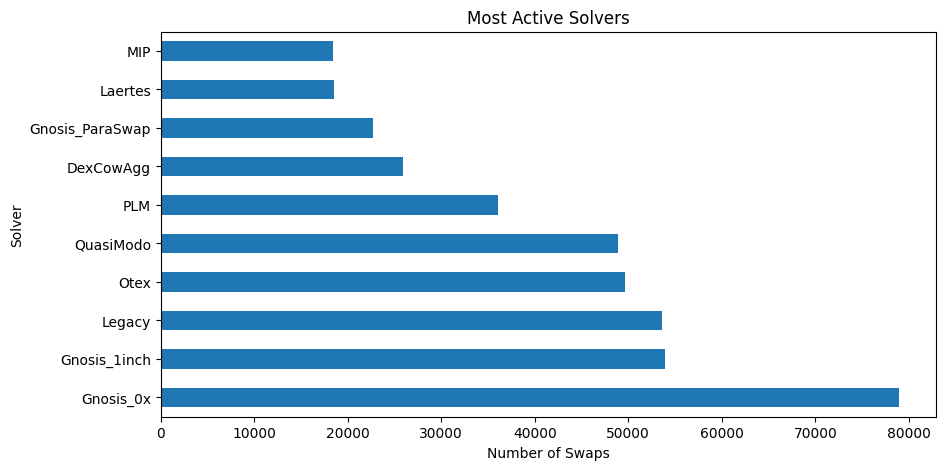

In [14]:
# get most active solvers and plot
most_active_solvers = cow_swaps['name'].value_counts().head(10)
most_active_solvers.plot(kind='barh', figsize=(10, 5))
plt.title('Most Active Solvers')
plt.xlabel('Number of Swaps')
plt.ylabel('Solver')
plt.show()

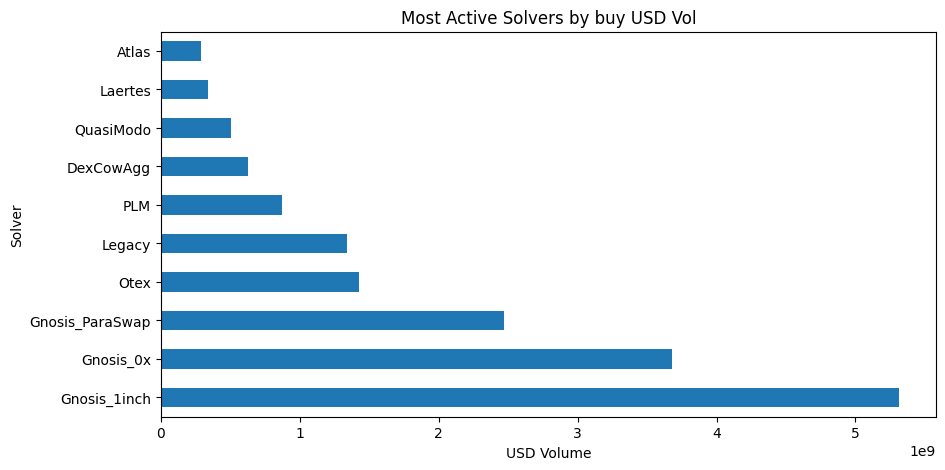

In [19]:
# get most active solver by usd volume
most_active_solvers_by_usd_buy_volume = cow_swaps.groupby('name')['buyAmountUsd'].sum().sort_values(ascending=False).head(10)
most_active_solvers_by_usd_buy_volume.plot(kind='barh', figsize=(10, 5))
plt.title('Most Active Solvers by buy USD Vol')
plt.xlabel('USD Volume')
plt.ylabel('Solver')
plt.show()

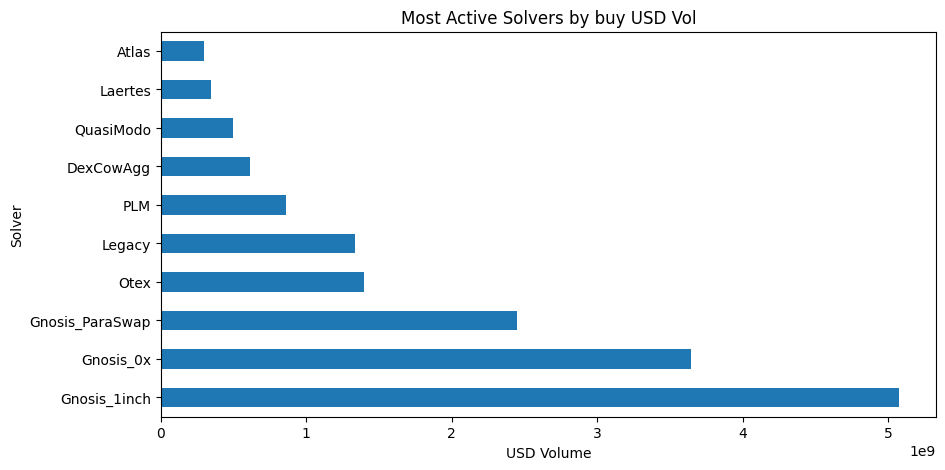

In [21]:
# get most active solver by usd volume
most_active_solvers_by_usd_sell_volume = cow_swaps.groupby('name')['sellAmountUsd'].sum().sort_values(ascending=False).head(10)
most_active_solvers_by_usd_sell_volume.plot(kind='barh', figsize=(10, 5))
plt.title('Most Active Solvers by buy USD Vol')
plt.xlabel('USD Volume')
plt.ylabel('Solver')
plt.show()

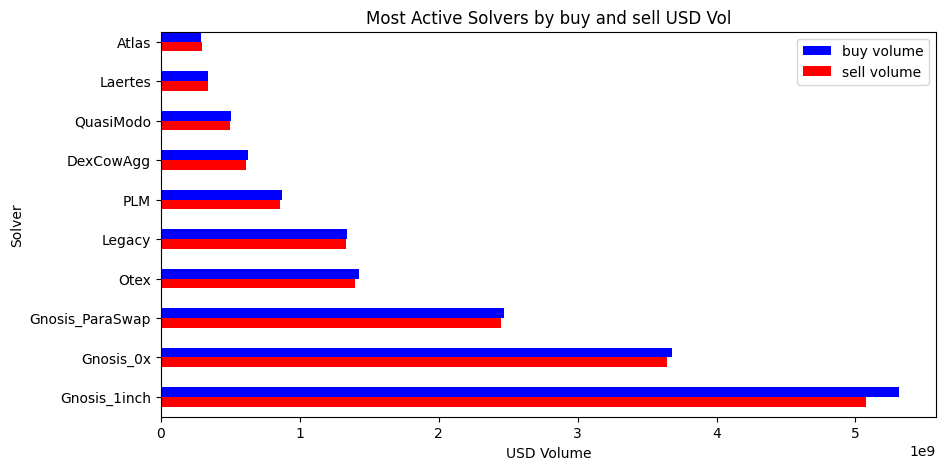

In [24]:
# plot most active sellers by usd buy and sell volume in same plot side by side with contrasting colors
fig, ax = plt.subplots(figsize=(10, 5))
most_active_solvers_by_usd_buy_volume.plot(kind='barh', ax=ax, color='blue', position=0, width=0.25, label='buy volume')
most_active_solvers_by_usd_sell_volume.plot(kind='barh', ax=ax, color='red', position=1, width=0.25, label='sell volume')
plt.title('Most Active Solvers by buy and sell USD Vol')
plt.xlabel('USD Volume')
plt.ylabel('Solver')
plt.legend()
plt.show()